In [1]:
import networkx as nx
import sys
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
data_file = 'topo'  # 'HepPh'
G = clean_data(data_file)
print(nx.number_of_nodes(G), nx.number_of_edges(G))


34 42


In [3]:
geo_loc_data = get_geo_data("Internet2LatLong.csv")
edge_geo_data_combined = assign_location(G, geo_loc_data)

# set edge attributes
set_edge_attr(G, edge_geo_data_combined)

### Degree, Two Step Neghbor $D - 2SN$

In [4]:
d = [(i, len(n_neighbor(G, i, 1)))
          for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
two_sn = [(i, len(n_neighbor(G, i, 2)))
          for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
combined_dict_d, combined_dict_k_2 = varying_examples(d, two_sn)

# Get ranked result
opti_rank_m1, ranked_nodes_m1 = rank_result(combined_dict_d, combined_dict_k_2)
# opti_rank_m1
# ranked_nodes_m1


In [5]:
ns_over_d = [(i, sum(hub_information(G, i, 1))/len(n_neighbor(G, i, 1)))
 for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]

combined_dict, combined_dict_k_2 = varying_examples(ns_over_d, two_sn)

# Get ranked result
opti_rank_m2, ranked_nodes_m2 = rank_result(combined_dict, combined_dict_k_2)
# opti_rank_m2
# ranked_nodes_m2


### $D - WD$

In [6]:
w_d = [(i[0],i[1]-(j[1])) for i,j in zip(ns_over_d, two_sn)]
combined_dict_w_d, combined_dict_k_w_d = varying_examples(d, w_d)

# Get ranked result
opti_rank_m3, ranked_nodes_m3 = rank_result(combined_dict_w_d, combined_dict_k_w_d)
# opti_rank_m3
# ranked_nodes_m3


### $K - 2SN$

In [7]:
# obtain the node degrees and edges weights to desired lengths
tmp_t = list(range(1, 5))
tmp_t_SN, tmp_t_hub = hubs_SN_NS(G, tmp_t)

combined_dict_m0, combined_dict_k_2 = varying_examples(
    tmp_t_SN[0][1], tmp_t_hub[1][2])

# Get ranked result
opti_rank_m0, ranked_nodes_m0 = rank_result(combined_dict_m0, combined_dict_k_2)

# print(opti_rank_m0, ranked_nodes_m0)


### Classical Model

In [8]:
max_ = 1
max_topk = round(max_ * nx.number_of_nodes(G))
newmethod_rank = EnRenewRank(G, max_topk, 2)


In [9]:
infect_prob = compute_probability(G) * 1.5
print(infect_prob)
atio = 1.5
cover_prob = infect_prob / atio
avg = 100
max_iter = 200000


0.8873239436619718


In [10]:
rates = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
topk_list = list(map(lambda x: round(nx.number_of_nodes(G) * x), rates))
topk_list


[5, 10, 15, 20, 26, 31]

### Weighted Degree $WD  - 2SN$
$Where  WD = (NS/D)$

In [11]:
m0_result = [get_sir_result(G, ranked_nodes_m0, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]
m1_result = [get_sir_result(G, ranked_nodes_m1, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]
m2_result = [get_sir_result(G, ranked_nodes_m2, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]
m3_result = [get_sir_result(G, ranked_nodes_m3, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]
newmethod_result = [get_sir_result(G,newmethod_rank, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]



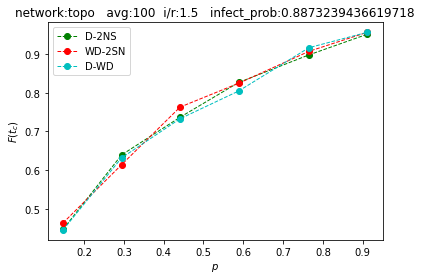

In [13]:
%matplotlib inline
plt.title(f'network:{data_file}   avg:{avg}  i/r:{atio}   infect_prob:{infect_prob}')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), m0_result, 'g--o', label='D-2NS', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), m1_result, 'b-o', label='D-2SN', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), m2_result, 'r--o', label='WD-2SN', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), m3_result, 'c--o', label='D-WD', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), newmethod_result, 'y--o', label='Classical', linewidth=1.0, )
plt.legend(loc="upper left")
plt.ylabel("$F(t_c)$")
plt.xlabel('$p$')
plt.show()

